### This notebook is for the ClickAcademy course Mastering Data and Analytics for Marketing (MDAM)

#### Pre-code 2: Must be run *every* time you restart the notebook or when it 'times out'

In [4]:
# Required step 1: Load library for %>% and other functions
library(tidyverse)

# Required step 2: Load lubridate to work with dates
library(lubridate)

# Required step 3: For percentage formatting
library(scales)

# Required step 4: read our data and put it in 'ec'
read_csv("health-ecommerce-website.csv",
         col_types = cols(dateTime = col_datetime()))%>%as_tibble->ec

# Required step 5: Create a 'time series' called ec_ts
ec %>%
group_by(Date=date(dateTime))%>%
summarize(visits=n(),
          pageviews=sum(pageviews),
          conversionRate=mean(purchased),
          purchases=sum(purchased),
          revenue=sum(purchaseAmount),
         AOV=revenue/purchases) -> ec_ts

In [5]:
ec_ts%>%head

Date,visits,pageviews,conversionRate,purchases,revenue,AOV
<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2014-07-25,4,28,0.00000000,0,0.00,NaN
2014-07-26,10,68,0.00000000,0,0.00,NaN
2014-07-27,10,72,0.10000000,1,99.48,99.4800
2014-07-28,28,205,0.10714286,3,340.41,113.4700
2014-07-29,66,383,0.06060606,4,388.93,97.2325
2014-07-30,57,360,0.07017544,4,361.47,90.3675


In [6]:
# Code 1: See 6 rows of ec data
ec %>% head

dateTime,country,profile,age,gender,referral,pageviews,purchased,purchaseAmount
<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2014-08-29 03:34:00,Australia,Friend/family friend,25-34,Female,Unbranded Search,9,0,0
2014-09-10 09:03:00,United States,Friend/family friend,25-34,Female,Unbranded Search,7,0,0
2014-08-13 22:43:00,United States,Friend/family friend,35-44,Female,Social,3,0,0
2014-09-05 12:37:00,United States,Friend/family friend,35-44,Female,Unbranded Search,7,0,0
2014-08-20 18:29:00,United States,Friend/family friend,45-54,Female,Unbranded Search,11,0,0
2014-08-04 02:17:00,United States,Friend/family friend,55-64,Female,Unbranded Search,11,0,0


In [7]:
# Code 2: Count the rows
ec %>% count

n
<int>
1592


In [8]:
# Code 3: Look at the data
ec %>% glimpse

Observations: 1,592
Variables: 9
$ dateTime       <dttm> 2014-08-29 03:34:00, 2014-09-10 09:03:00, 2014-08-13 …
$ country        <chr> "Australia", "United States", "United States", "United…
$ profile        <chr> "Friend/family friend", "Friend/family friend", "Frien…
$ age            <chr> "25-34", "25-34", "35-44", "35-44", "45-54", "55-64", …
$ gender         <chr> "Female", "Female", "Female", "Female", "Female", "Fem…
$ referral       <chr> "Unbranded Search", "Unbranded Search", "Social", "Unb…
$ pageviews      <dbl> 9, 7, 3, 7, 11, 11, 12, 5, 3, 2, 5, 2, 2, 12, 12, 3, 4…
$ purchased      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ purchaseAmount <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


In [9]:
# Code 4: A count of every 'profile' in our data set
ec %>%
count(profile)

profile,n
<chr>,<int>
Friend/family friend,23
Health Professional,277
Other,134
Parent,776
Patient,52
Relative,107
Teacher,223


In [10]:
# Code 5: Profile count using arrange 
ec %>%
count(profile) %>%
arrange(n)

profile,n
<chr>,<int>
Friend/family friend,23
Patient,52
Relative,107
Other,134
Teacher,223
Health Professional,277
Parent,776


In [11]:
# Code 6: Arrange the profile count in descending order
ec %>%
count(profile) %>%
arrange(-n)

profile,n
<chr>,<int>
Parent,776
Health Professional,277
Teacher,223
Other,134
Relative,107
Patient,52
Friend/family friend,23


In [12]:
# Code 7: Researching an audience
ec %>%
count(profile,age)

profile,age,n
<chr>,<chr>,<int>
Friend/family friend,18-24,5
Friend/family friend,25-34,5
Friend/family friend,35-44,5
Friend/family friend,45-54,4
Friend/family friend,55-64,4
Health Professional,18-24,34
Health Professional,25-34,60
Health Professional,35-44,62
Health Professional,45-54,61


In [13]:
# Code 8: See only the top 10 of our audience
ec %>%
count(profile,age) %>%
arrange(-n)%>%
head(10)

profile,age,n
<chr>,<chr>,<int>
Parent,35-44,237
Parent,25-34,177
Parent,45-54,144
Parent,18-24,103
Parent,55-64,103
Teacher,45-54,63
Health Professional,35-44,62
Health Professional,45-54,61
Health Professional,25-34,60


In [14]:
# Code 9: Researching our top 10 audience's behaviour

ec %>%
count(profile,age,referral)%>%
arrange(-n)%>%
head(10)

profile,age,referral,n
<chr>,<chr>,<chr>,<int>
Parent,35-44,Unbranded Search,106
Parent,25-34,Unbranded Search,92
Parent,35-44,Direct,74
Parent,45-54,Unbranded Search,69
Parent,18-24,Unbranded Search,53
Parent,55-64,Unbranded Search,53
Parent,45-54,Direct,46
Parent,25-34,Direct,44
Health Professional,25-34,Unbranded Search,38


In [15]:
# Code 10: Filter for more specific analysis
ec %>%
filter(profile=="Parent") %>%
count(profile,age,referral)%>%
arrange(-n)%>%
head(10)

profile,age,referral,n
<chr>,<chr>,<chr>,<int>
Parent,35-44,Unbranded Search,106
Parent,25-34,Unbranded Search,92
Parent,35-44,Direct,74
Parent,45-54,Unbranded Search,69
Parent,18-24,Unbranded Search,53
Parent,55-64,Unbranded Search,53
Parent,45-54,Direct,46
Parent,25-34,Direct,44
Parent,35-44,Referred,28


In [16]:
# Code 11: Did our top 10 audience buy anything?

ec %>%
count(profile,age,purchased)%>%
arrange(-n)%>%
head(10)

profile,age,purchased,n
<chr>,<chr>,<dbl>,<int>
Parent,35-44,0,215
Parent,25-34,0,162
Parent,45-54,0,127
Parent,18-24,0,97
Parent,55-64,0,94
Health Professional,25-34,0,58
Health Professional,35-44,0,58
Health Professional,45-54,0,58
Teacher,45-54,0,58


In [17]:
# Code 12: How many purchased in total?

ec%>%count(purchased)

purchased,n
<dbl>,<int>
0,1479
1,113


In [18]:
# Code 13: Who were our best customers?

ec %>%
filter(purchased==1)%>%
count(profile,age,purchased)%>%
arrange(-n)%>%
head(10)

profile,age,purchased,n
<chr>,<chr>,<dbl>,<int>
Parent,35-44,1,22
Parent,45-54,1,17
Parent,25-34,1,15
Parent,55-64,1,9
Parent,18-24,1,6
Teacher,45-54,1,5
Health Professional,35-44,1,4
Teacher,35-44,1,4
Health Professional,45-54,1,3


In [19]:
# Code 14: Another way to see how many purchased
ec%>%
summarize(sum(purchased))

sum(purchased)
<dbl>
113


In [20]:
# Code 15: Calculate total pageviews
ec%>%
summarize(sum(pageviews))

sum(pageviews)
<dbl>
10770


In [21]:
# Code 16: Calculate the mean of 6-side dice
(1+2+3+4+5+6)/ 6

[1] 3.5

In [22]:
# Code 17: Sum of random sample of 'n' dice throws, divided by 'n'
n=10
sum(sample(1:6,n,replace=TRUE))/n

[1] 3.7

In [23]:
# Code 18: Sum of pageviews divided by count of observations (rows)
ec%>%
summarize(sum(pageviews)/n())

sum(pageviews)/n()
<dbl>
6.765075


In [24]:
# Code 19: Calculating the mean of pageviews
ec%>%
summarize(mean(pageviews))

mean(pageviews)
<dbl>
6.765075


In [25]:
# Code 20: Counting pageviews by age
ec %>%
count(age,pageviews)%>%
head

age,pageviews,n
<chr>,<dbl>,<int>
18-24,1,12
18-24,2,22
18-24,3,30
18-24,4,30
18-24,5,11
18-24,6,12


In [26]:
# Code 21: Total pageviews by age using group_by
ec %>%
group_by(age)%>%
summarize(sum(pageviews))

age,sum(pageviews)
<chr>,<dbl>
18-24,1503
25-34,2347
35-44,2757
45-54,2209
55-64,1709
65 or older,72
Less than 18,173


In [27]:
# Code 22: Mean / expected value of pageviews by age
ec %>%
group_by(age)%>%
summarize(mean(pageviews))

age,mean(pageviews)
<chr>,<dbl>
18-24,6.621145
25-34,7.090634
35-44,6.944584
45-54,6.653614
55-64,6.424812
65 or older,5.142857
Less than 18,6.920000


In [28]:
# Code 23 : Who has been our best customer?
ec %>%
group_by(age)%>%
summarize(mean(purchased),sum(purchased),mean(purchaseAmount))

age,mean(purchased),sum(purchased),mean(purchaseAmount)
<chr>,<dbl>,<dbl>,<dbl>
18-24,0.05286344,12,5.630396
25-34,0.05740181,19,5.811239
35-44,0.08312343,33,8.386650
45-54,0.09036145,30,8.810873
55-64,0.05639098,15,5.916729
65 or older,0.07142857,1,8.033571
Less than 18,0.12000000,3,14.506800


In [29]:
# Code 24 : Formatting output
dollar(10.0578)
label_percent(accuracy=.1)(.053444)

[1] "$10.06"

[1] "5.3%"

In [30]:
# Code 25: Who has been our best customer? (for presentation)

ec %>%
group_by(age)%>%
summarize(purchaseRate=label_percent(accuracy=.1)(mean(purchased)),
          purchases=sum(purchased),
          AOV=dollar(sum(purchaseAmount)/sum(purchased)))%>%
arrange(-purchases)

age,purchaseRate,purchases,AOV
<chr>,<chr>,<dbl>,<chr>
35-44,8.3%,33,$100.89
45-54,9.0%,30,$97.51
25-34,5.7%,19,$101.24
55-64,5.6%,15,$104.92
18-24,5.3%,12,$106.51
Less than 18,12.0%,3,$120.89
65 or older,7.1%,1,$112.47


In [31]:
# Code 25a: Who has been our best customer? (for exercises)

ec %>%
group_by(age)%>%
summarize(purchaseRate=mean(purchased),
          purchases=sum(purchased),
          AOV=sum(purchaseAmount)/sum(purchased))%>%
arrange(-purchases)

age,purchaseRate,purchases,AOV
<chr>,<dbl>,<dbl>,<dbl>
35-44,0.08312343,33,100.8939
45-54,0.09036145,30,97.5070
25-34,0.05740181,19,101.2379
55-64,0.05639098,15,104.9233
18-24,0.05286344,12,106.5083
Less than 18,0.12000000,3,120.8900
65 or older,0.07142857,1,112.4700


In [32]:
# Code 26: Group_by dateTime

ec %>%
group_by(dateTime)%>%
summarize(totalPageviews=sum(pageviews))%>%
head

dateTime,totalPageviews
<dttm>,<dbl>
2014-07-25 14:10:00,6
2014-07-25 15:01:00,1
2014-07-25 15:15:00,10
2014-07-25 17:05:00,11
2014-07-26 00:27:00,3
2014-07-26 01:50:00,11


In [33]:
# Code 27 : The right way to group_by dateTime
ec %>%
group_by(date(dateTime))%>%
summarize(totalPageviews=sum(pageviews))%>%head

date(dateTime),totalPageviews
<date>,<dbl>
2014-07-25,28
2014-07-26,68
2014-07-27,72
2014-07-28,205
2014-07-29,383
2014-07-30,360


In [34]:
# Code 28 : View statistics by weekdays
ec %>%
group_by(weekdays(dateTime))%>%
summarize(totalPageviews=sum(pageviews))

weekdays(dateTime),totalPageviews
<chr>,<dbl>
Friday,1186
Monday,1758
Saturday,987
Sunday,920
Thursday,1439
Tuesday,2015
Wednesday,2465


In [35]:
# Code 29: View statistics by weekdays in the correct order
ec %>%
group_by(weekday=weekdays(dateTime),weekdayIndex=wday(dateTime,week_start=7))%>%
summarize(totalPageviews=sum(pageviews)) %>%
arrange(weekdayIndex)

weekday,weekdayIndex,totalPageviews
<chr>,<dbl>,<dbl>
Sunday,1,920
Monday,2,1758
Tuesday,3,2015
Wednesday,4,2465
Thursday,5,1439
Friday,6,1186
Saturday,7,987


In [36]:
# Code 30: Create a 'time series'
ec %>%
group_by(Date=date(dateTime))%>%
summarize(visits=n(),
          pageviews=sum(pageviews),
          conversionRate=mean(purchased),
          purchases=sum(purchased),
          revenue=sum(purchaseAmount),
         AOV=sum(revenue/purchases)) -> ec_ts

ec_ts%>%
    head

Date,visits,pageviews,conversionRate,purchases,revenue,AOV
<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2014-07-25,4,28,0.00000000,0,0.00,NaN
2014-07-26,10,68,0.00000000,0,0.00,NaN
2014-07-27,10,72,0.10000000,1,99.48,99.4800
2014-07-28,28,205,0.10714286,3,340.41,113.4700
2014-07-29,66,383,0.06060606,4,388.93,97.2325
2014-07-30,57,360,0.07017544,4,361.47,90.3675


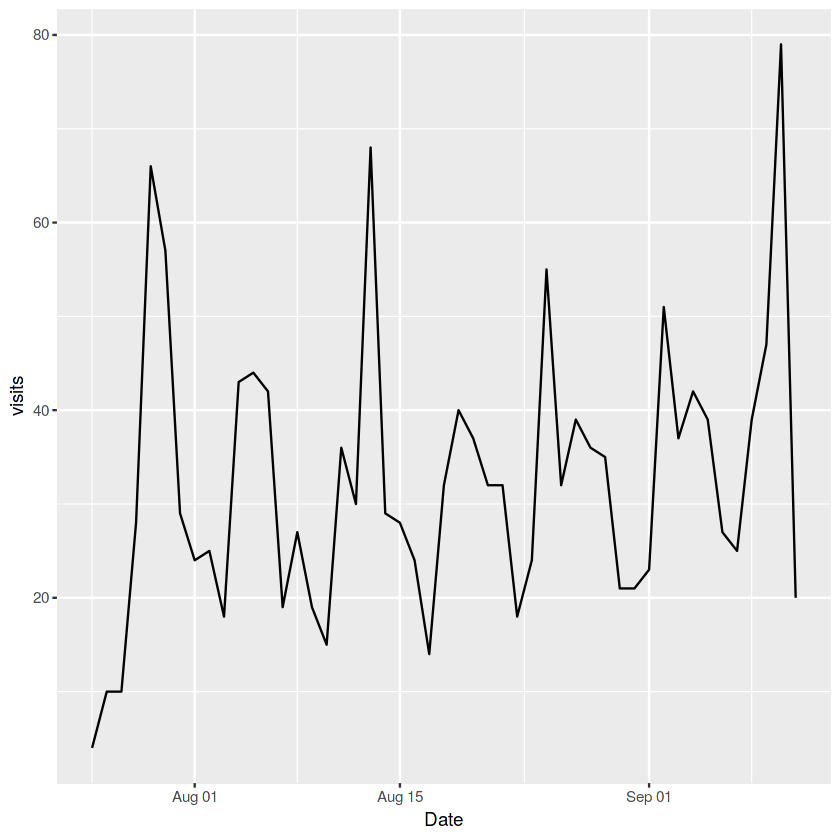

In [37]:
# Code 31: Plot a 'time series'
ec_ts %>%
    ggplot(aes(x=Date,y=visits))+
    geom_line()

In [38]:
# Code 32: Resize the plot
options(repr.plot.width=12, repr.plot.height=8)

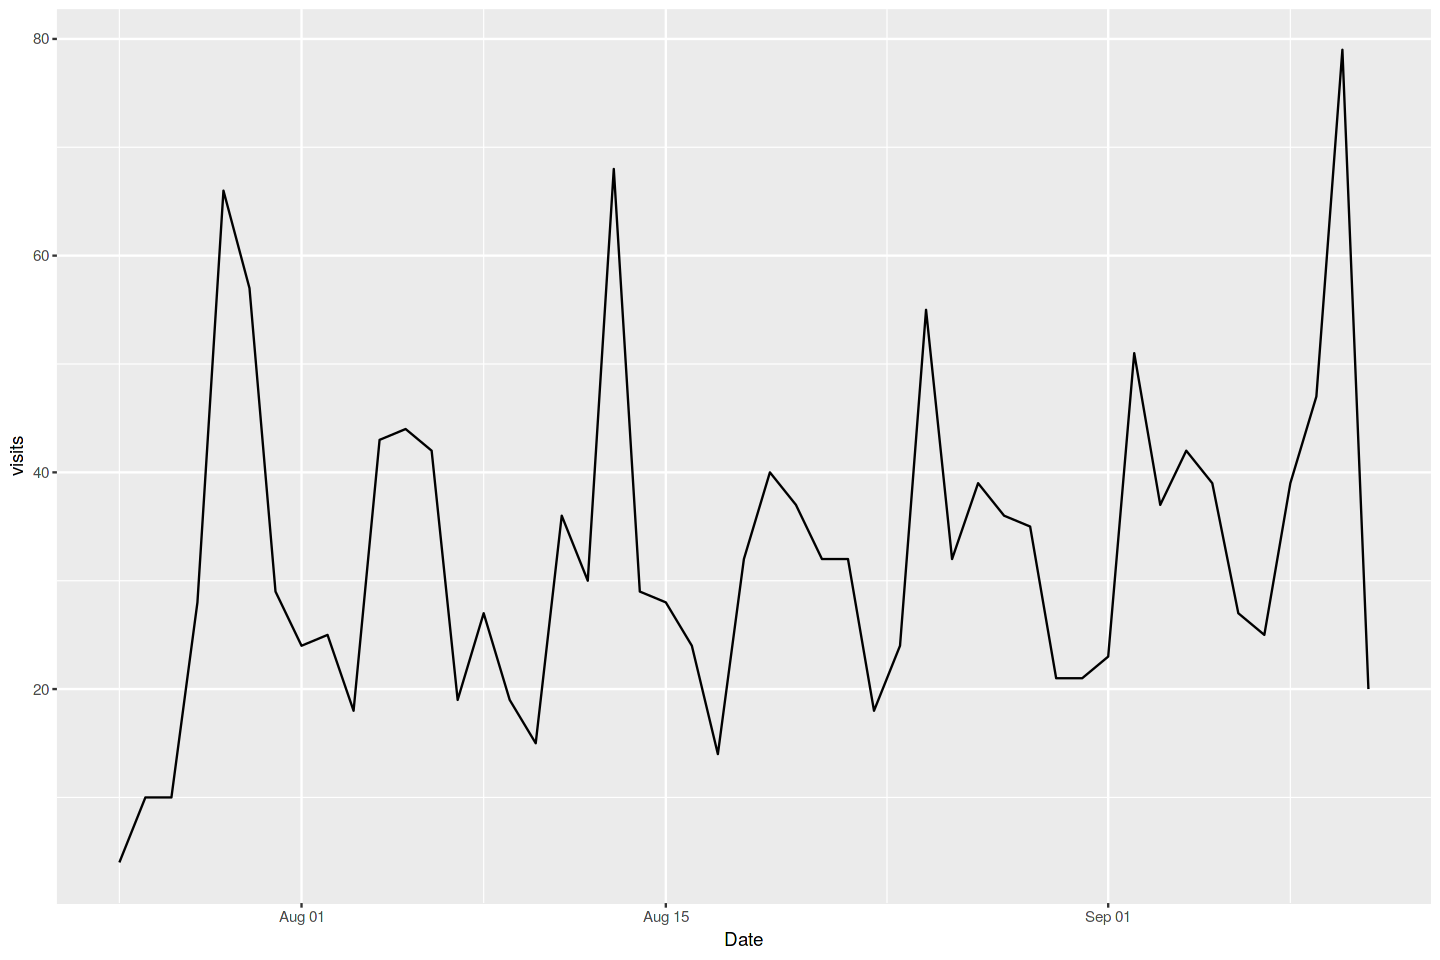

In [39]:
# Code 33: 'Re-plot' the time series
ec_ts %>%
    ggplot(aes(x=Date,y=visits))+
    geom_line()

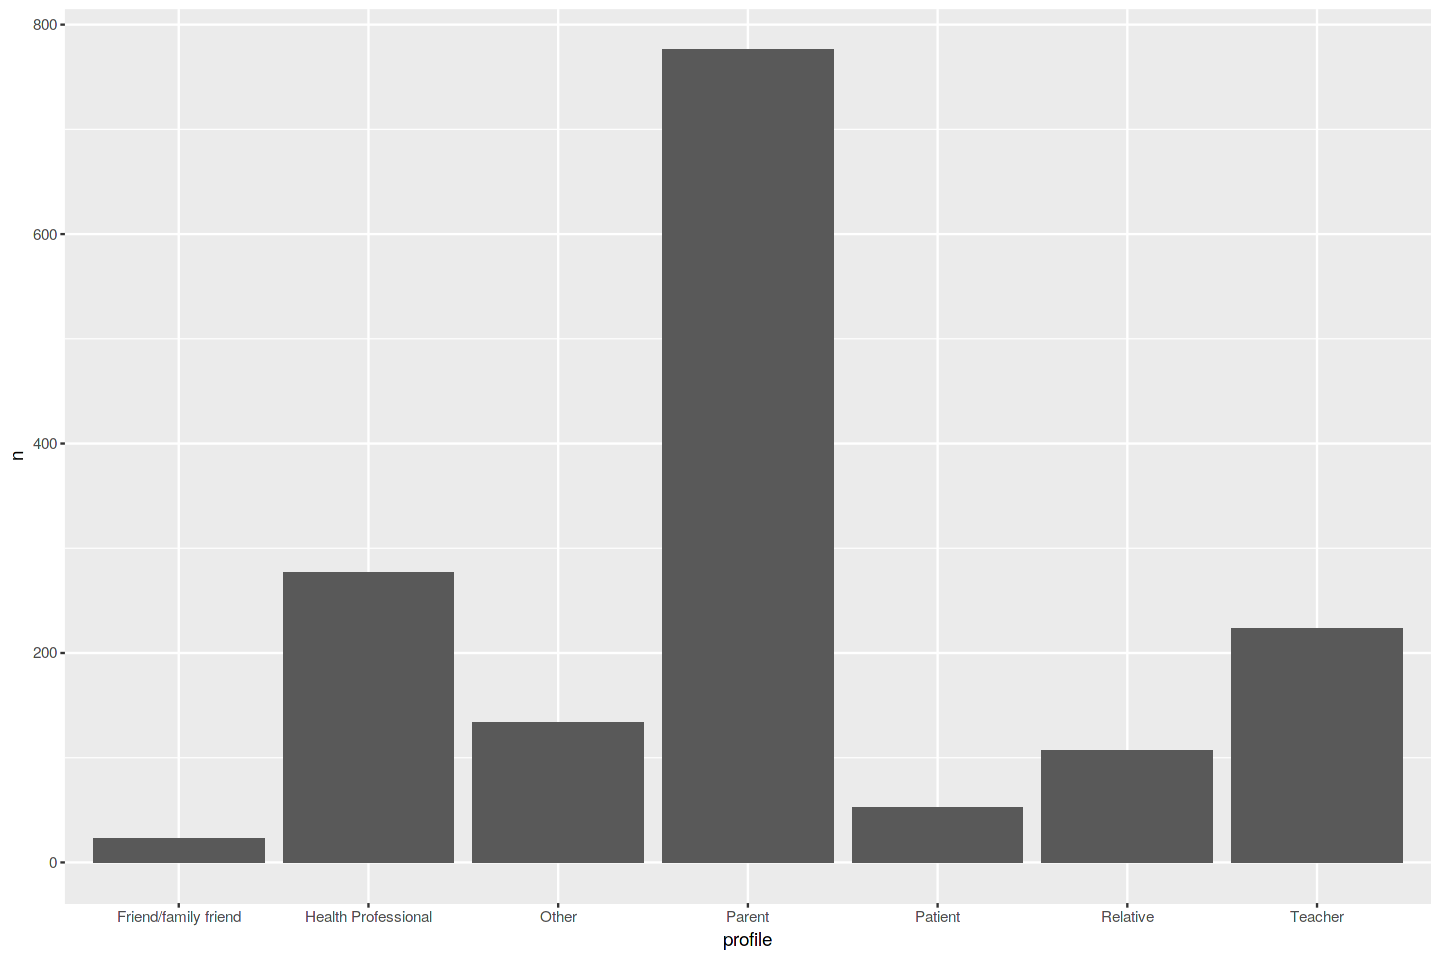

In [40]:
# Code 34: Visualize categorical data
ec %>%
    count(profile)%>%
    ggplot(aes(x=profile,y=n))+
    geom_col()

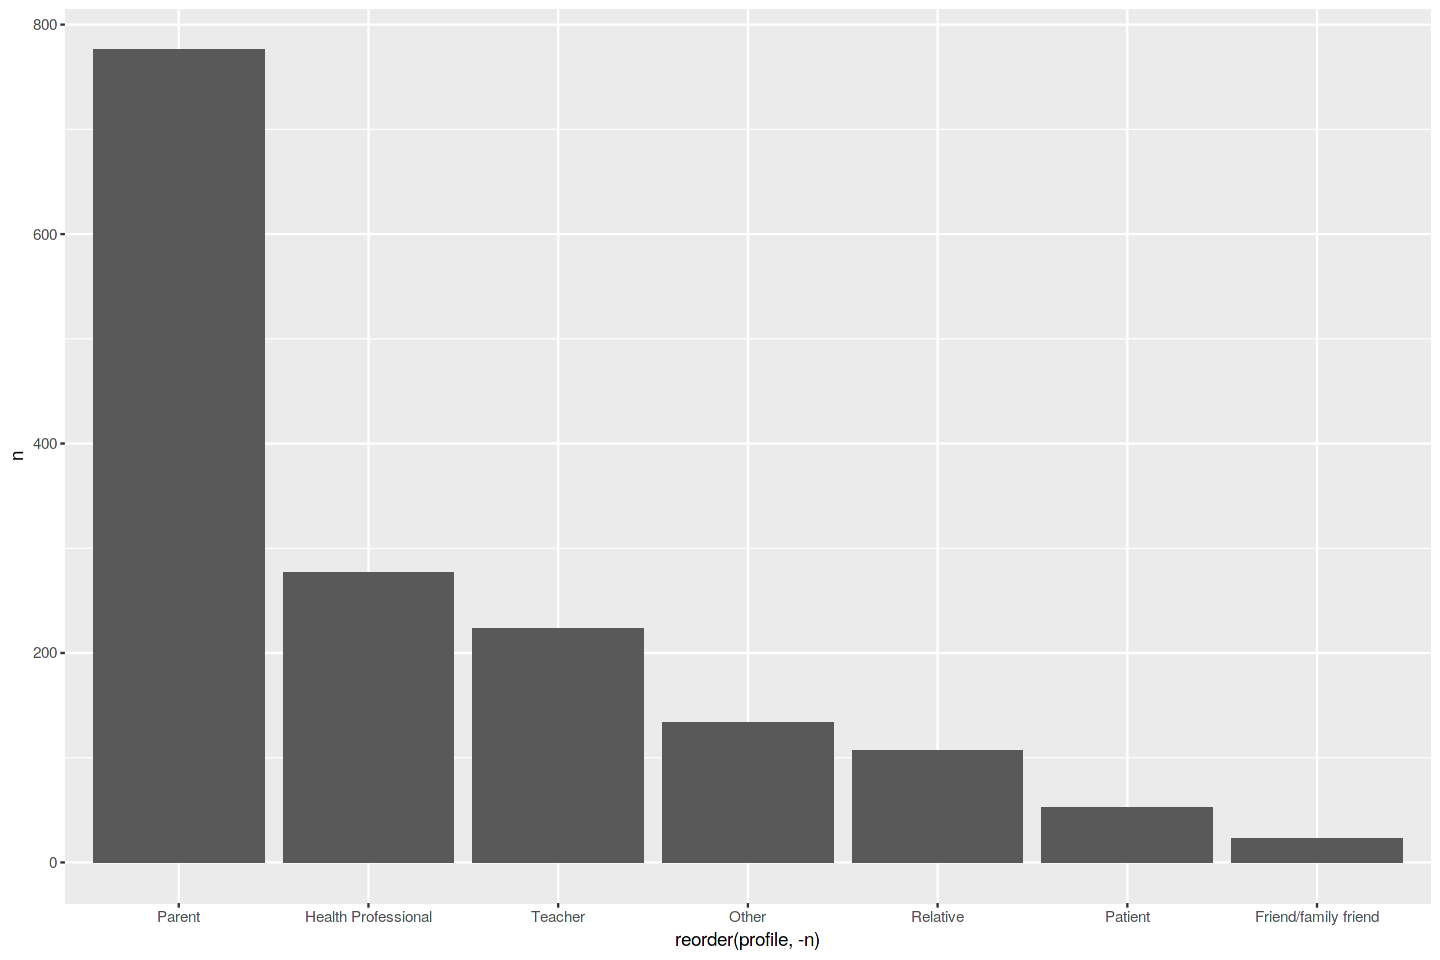

In [41]:
# Code 35: Visualize categorical data in the correct order
ec %>%
    count(profile)%>%
    ggplot(aes(x=reorder(profile,-n),y=n))+
    geom_col()

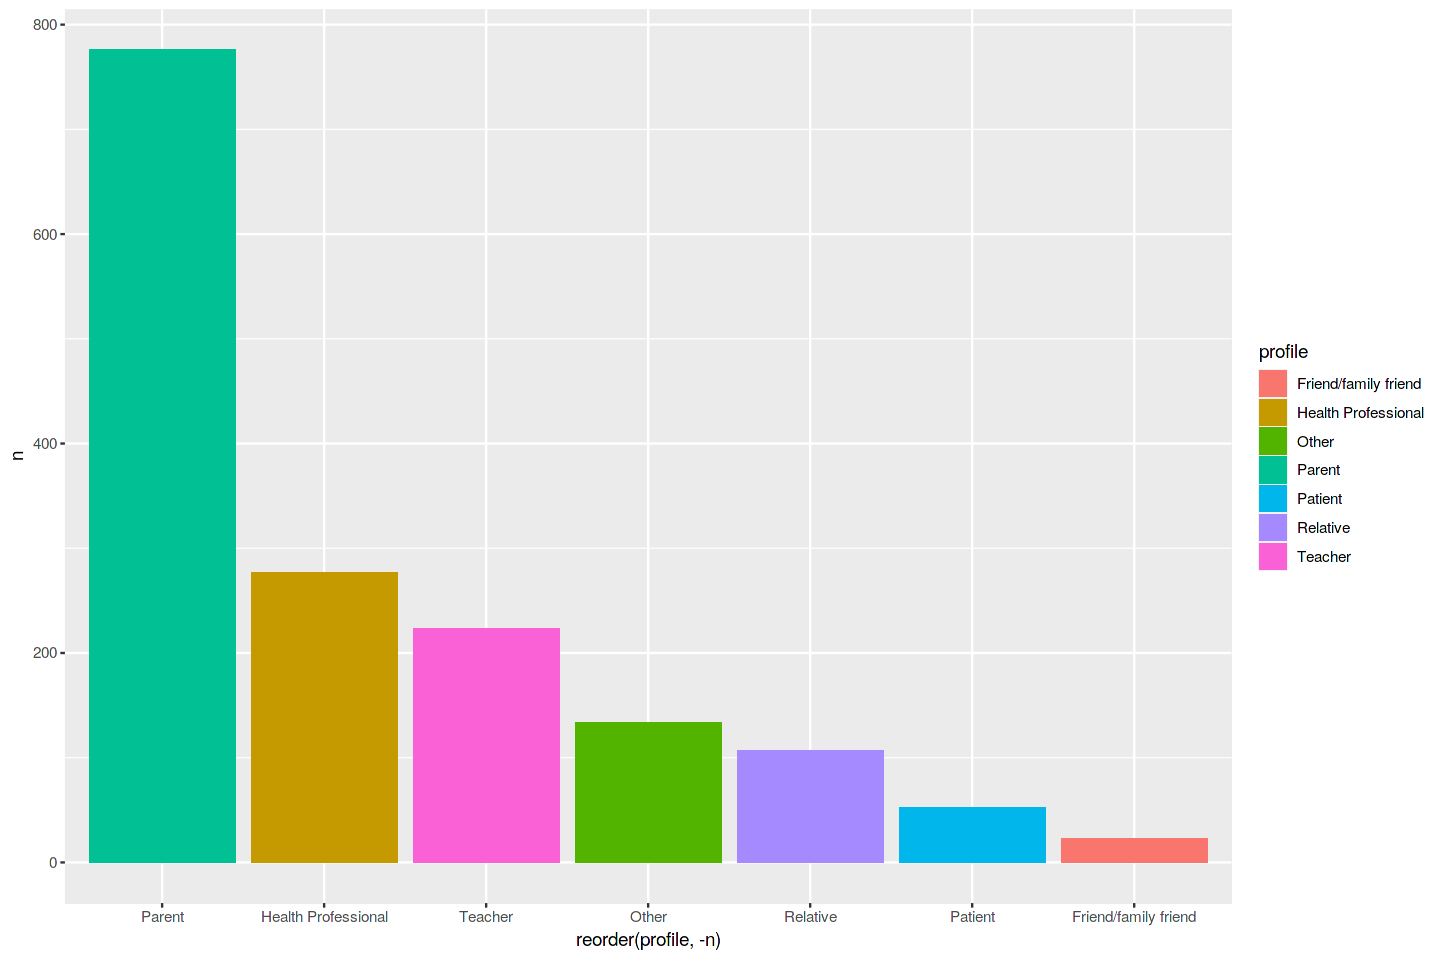

In [42]:
# Code 36: Visualize categorical data with colour
ec %>%
    count(profile)%>%
    ggplot(aes(x=reorder(profile,-n),y=n,fill=profile))+
    geom_col()

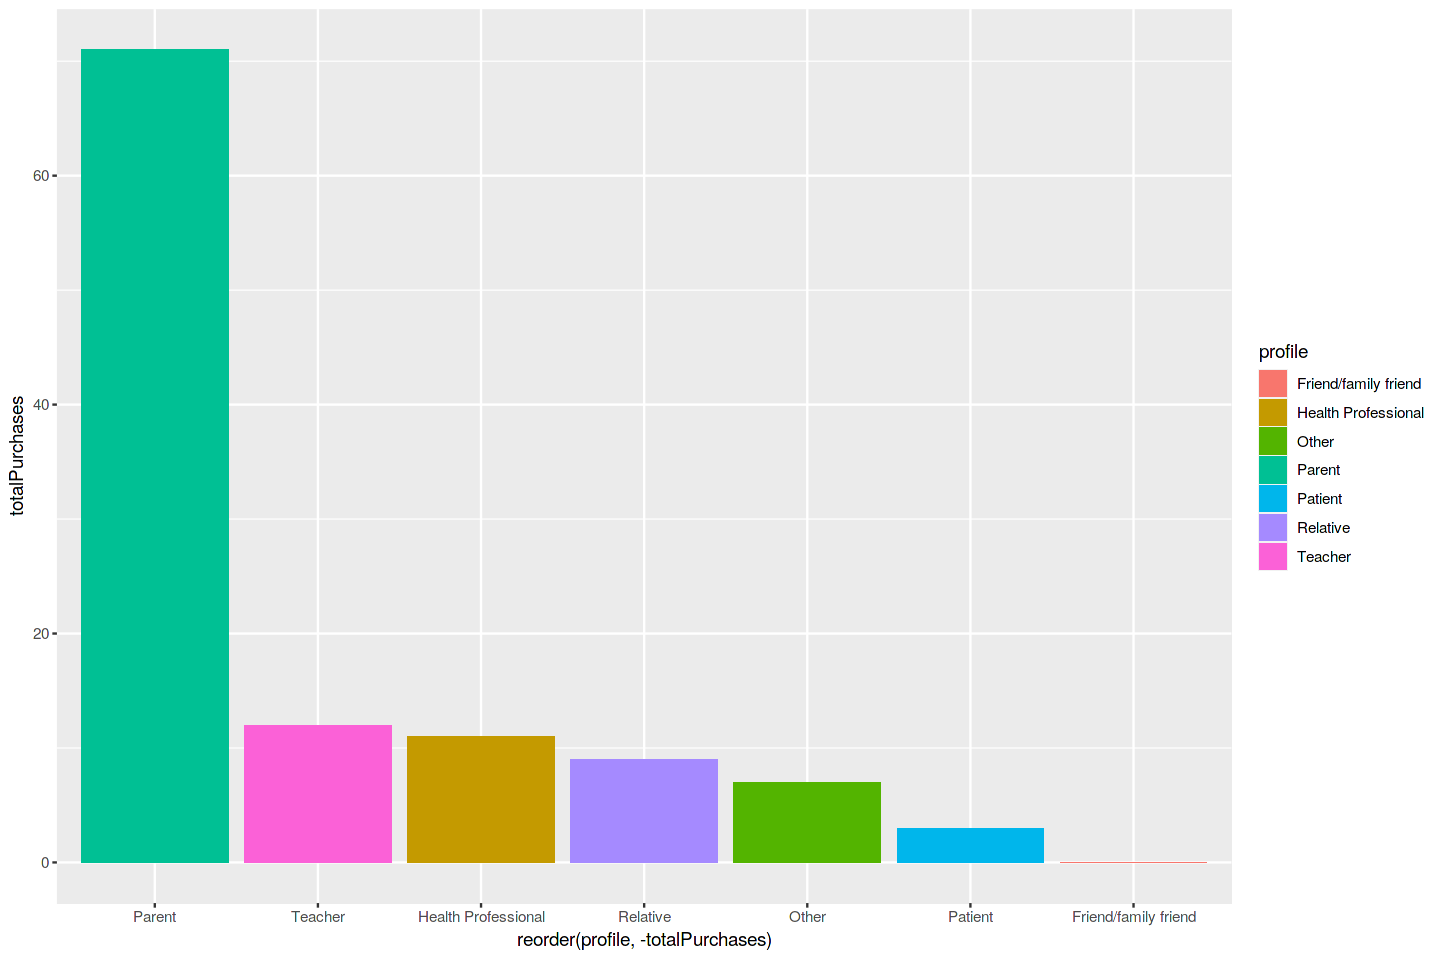

In [43]:
# Code 37: Visualize continuous data by category
ec %>%
    group_by(profile)%>%
    summarize(totalPurchases=sum(purchased)) %>%
    ggplot(aes(x=reorder(profile,-totalPurchases),
               y=totalPurchases,fill=profile))+
        geom_col()

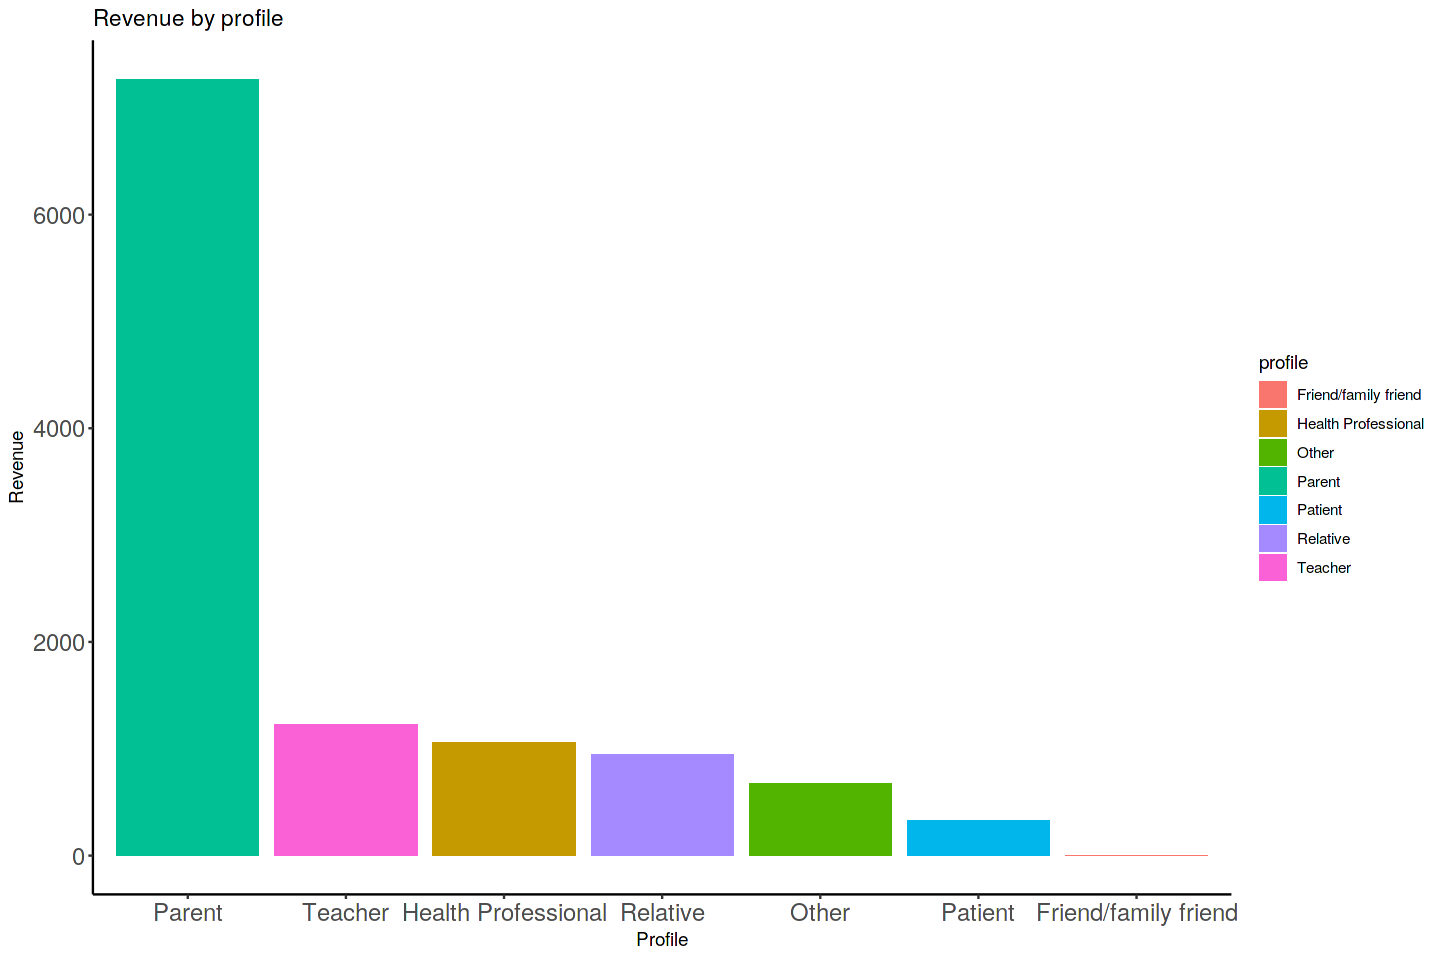

In [44]:
# Code 38: Add a x and y labels and a title
ec %>%
    group_by(profile)%>%
    summarize(totalPurchases=sum(purchaseAmount)) %>%
    ggplot(aes(x=reorder(profile,-totalPurchases),y=totalPurchases,fill=profile))+
        geom_col()+
        theme_classic()+
        theme(axis.text=element_text(size=14))+
        ggtitle("Revenue by profile") +
        xlab("Profile") + ylab("Revenue")

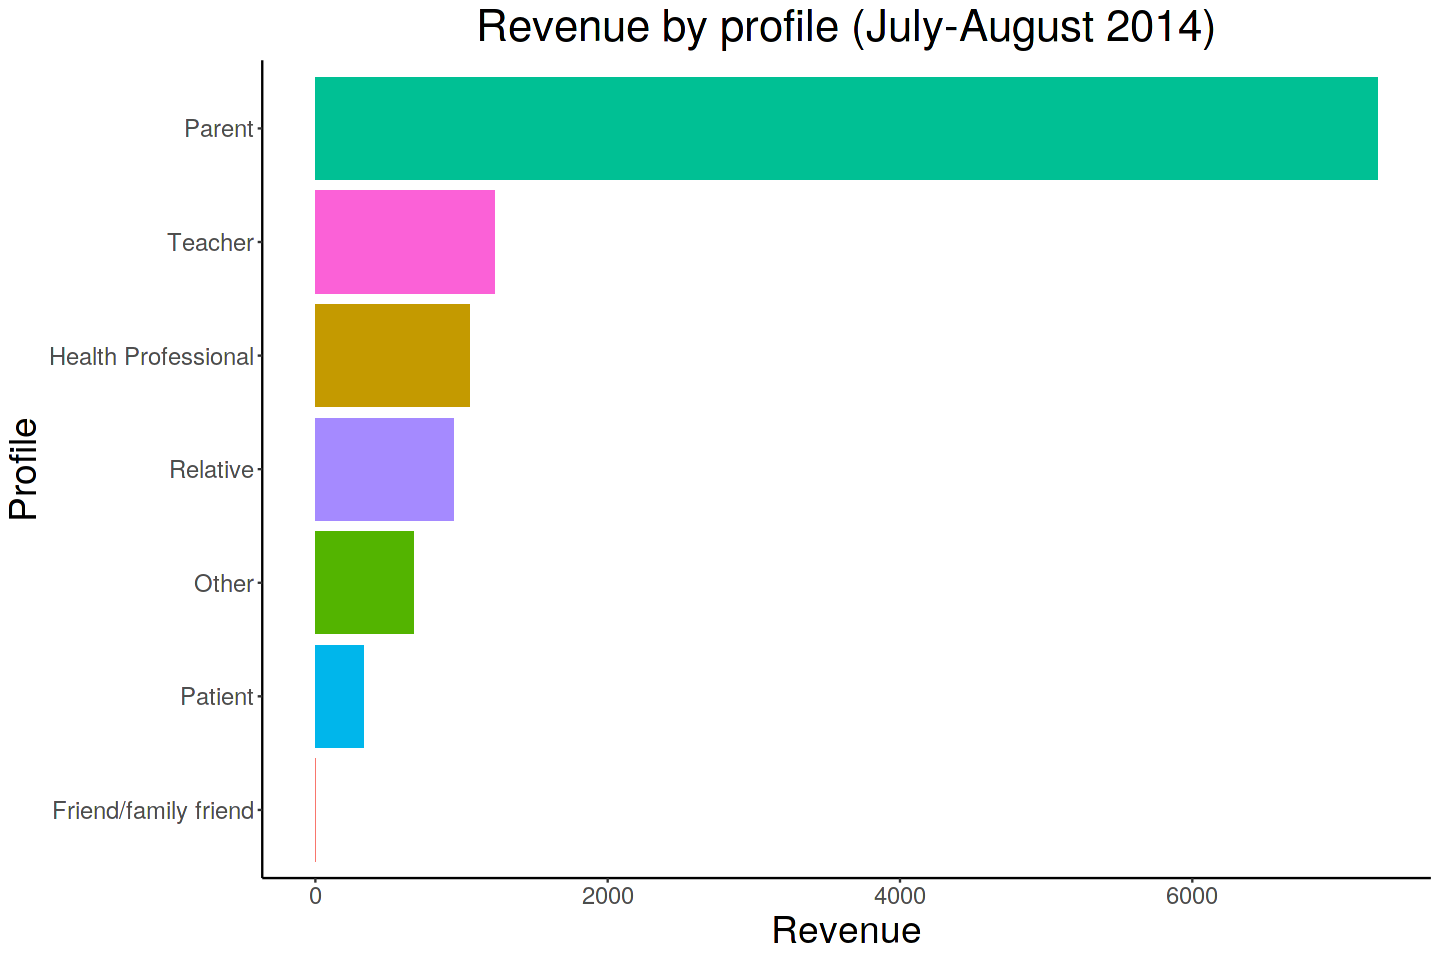

In [45]:
# Code 39 : Bar chart with formatted text
ec %>%
    group_by(profile)%>%
    summarize(totalPurchases=sum(purchaseAmount)) %>%
    ggplot(aes(x=reorder(profile,totalPurchases),y=totalPurchases,fill=profile))+
        geom_col()+
       coord_flip()+
        theme_classic()+
        theme(axis.text=element_text(size=14),
            plot.title = element_text(size=26,hjust = 0.5),
            axis.title.x=element_text(size=22),
            axis.title.y=element_text(size=22),
             legend.position = "none")+
        ggtitle("Revenue by profile (July-August 2014)") +
        xlab("Profile") + ylab("Revenue")

dataPoint
<dbl>
1
5
5
10


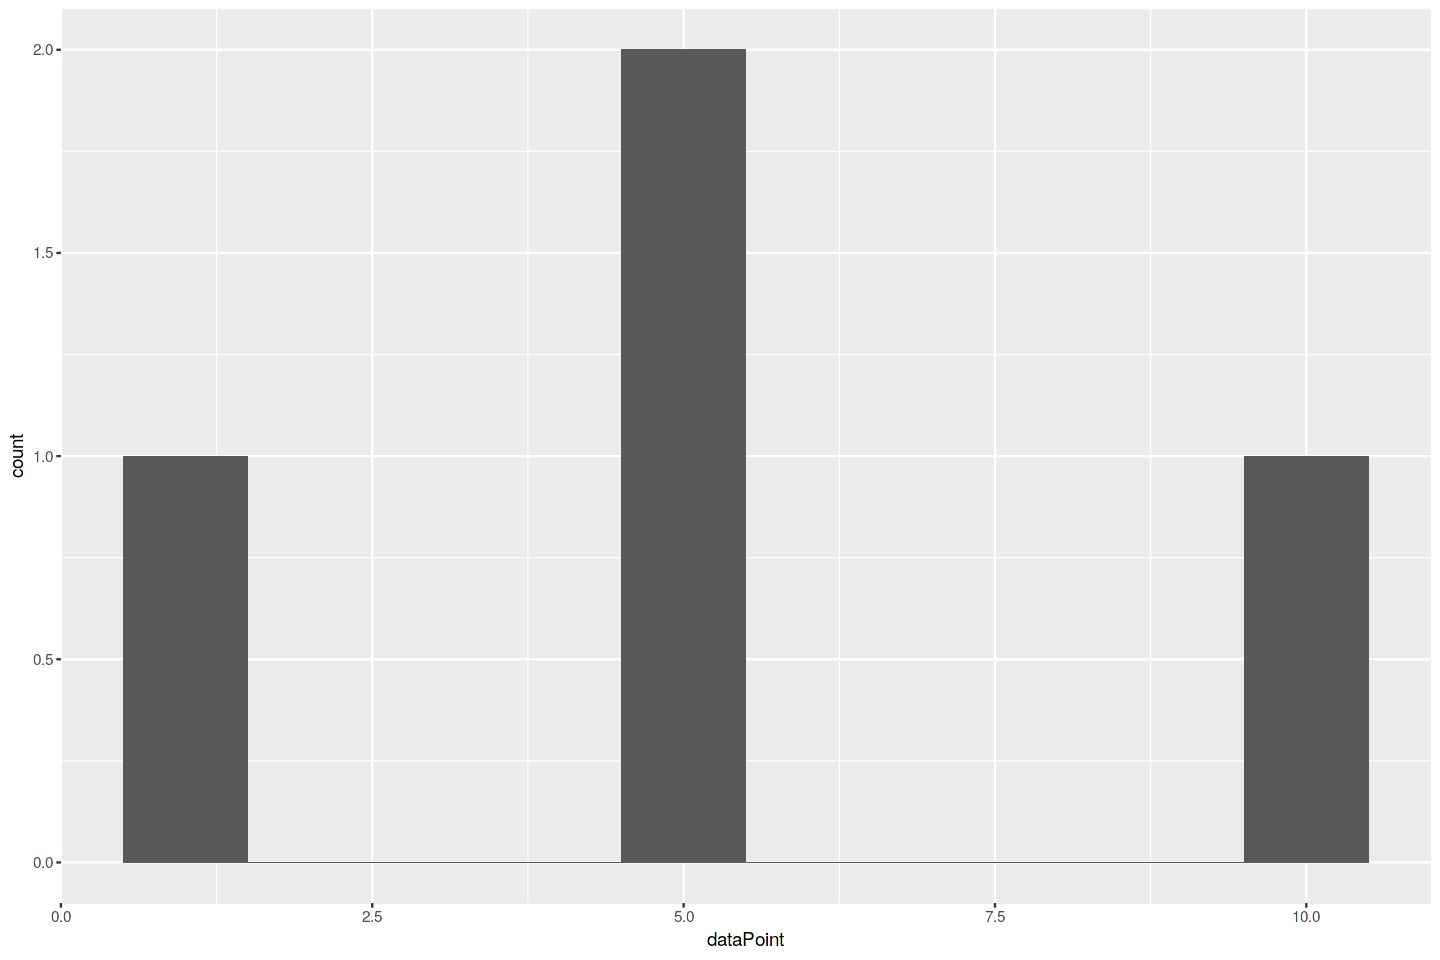

In [46]:
# Code 40: Let's build a histogram!
tribble(~dataPoint,1,5,5,10)->ourData
ourData

ourData %>%
    ggplot(aes(x=dataPoint))+
        geom_histogram(binwidth=1)

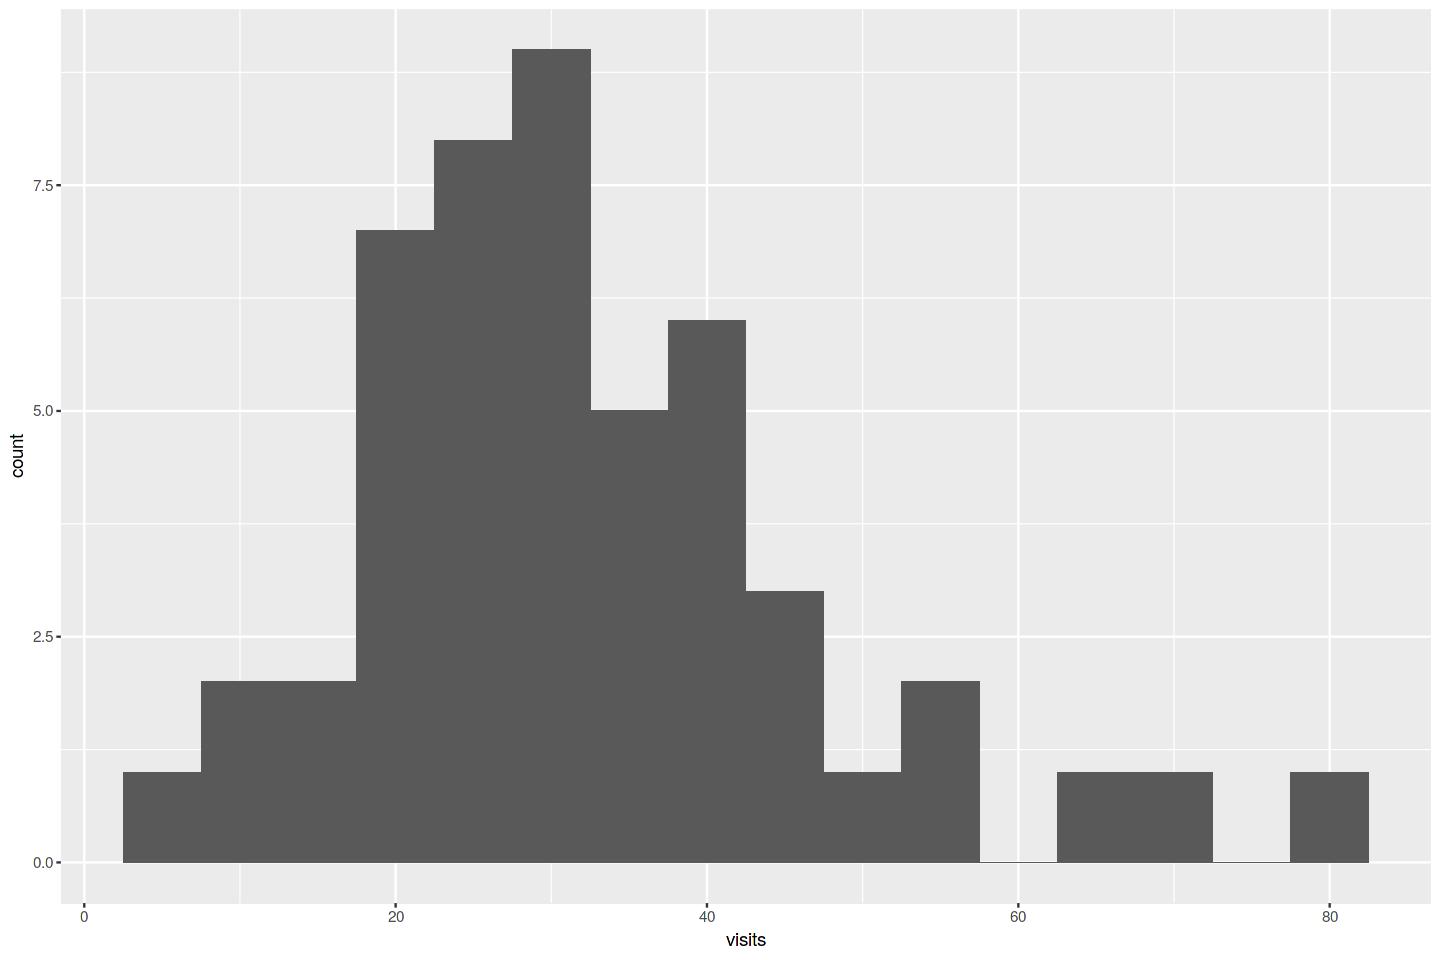

In [47]:
ec_ts%>%
    ggplot(aes(x=visits))+
    geom_histogram(binwidth=5)

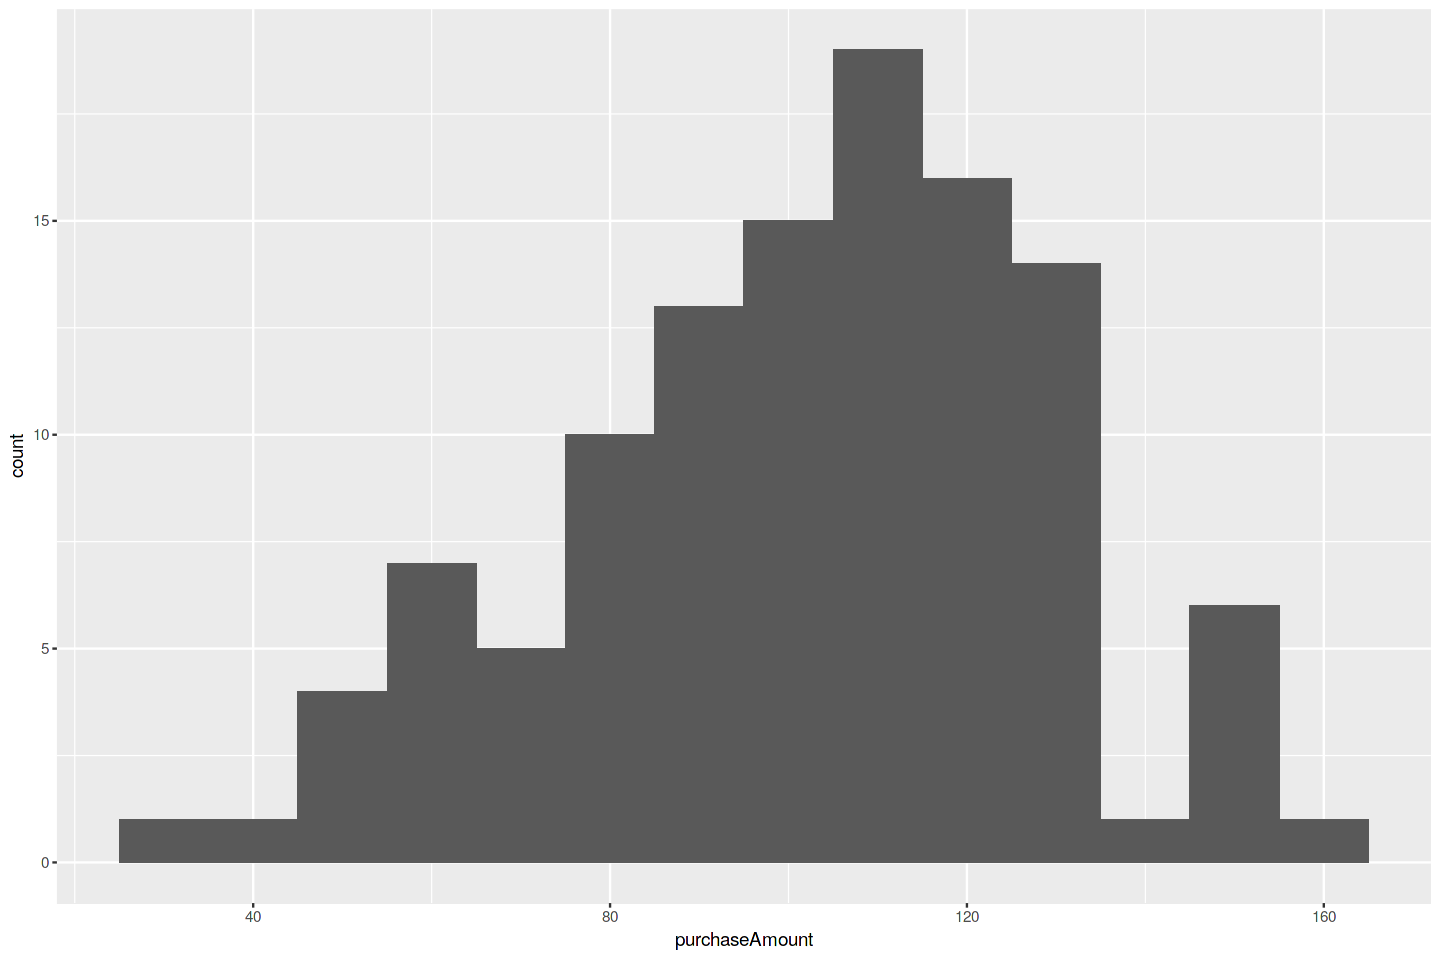

In [48]:
# Code 41: Histogram purchaseAmount
ec%>%
    filter(purchaseAmount>0)%>%
    ggplot(aes(x=purchaseAmount))+
        geom_histogram(binwidth=10)

In [49]:
# Code 42: Let's run a t-test!
tribble(~dataPoint,1,4,5,10)->ourData
ourData

ourData %>%
    .$dataPoint %>%
    t.test()

dataPoint
<dbl>
1
4
5
10



	One Sample t-test

data:  .
t = 2.6726, df = 3, p-value = 0.07552
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.9538119 10.9538119
sample estimates:
mean of x 
        5 


In [50]:
# Code 43: Purchase amount t-test
ec %>%
    filter(purchaseAmount>0)%>%
    .$purchaseAmount %>%
    t.test()


	One Sample t-test

data:  .
t = 41.031, df = 112, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
  96.90028 106.73370
sample estimates:
mean of x 
  101.817 


`geom_smooth()` using formula 'y ~ x'



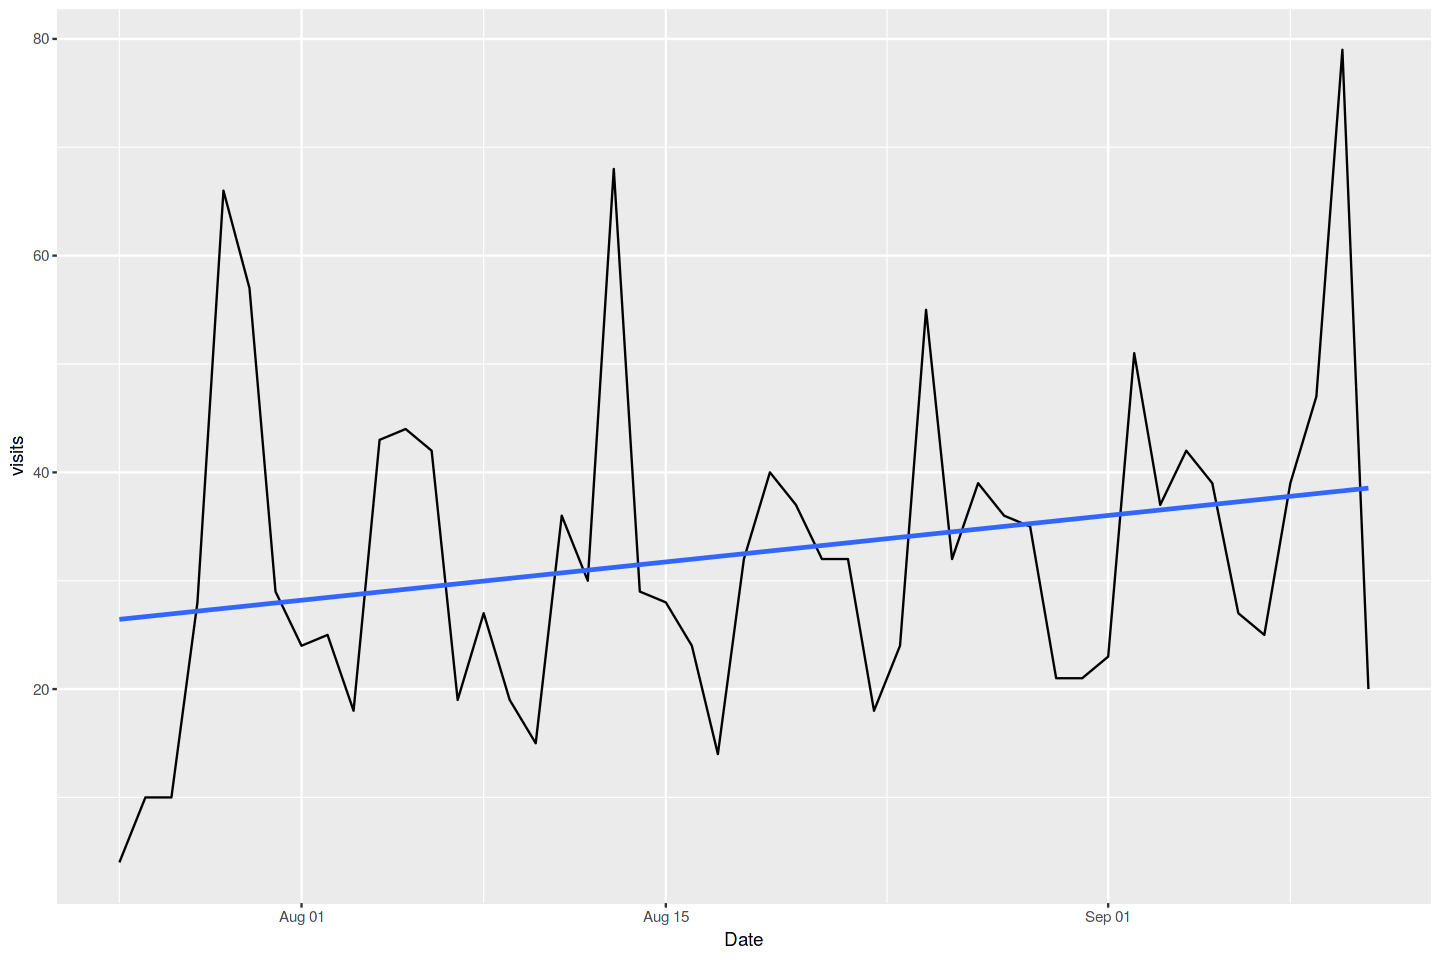

In [51]:
# Code 44: Plot a time series with a 'trendline'
ec_ts %>%
    ggplot(aes(x=Date,y=visits))+
    geom_line()+
    geom_smooth(method="lm",se=F)

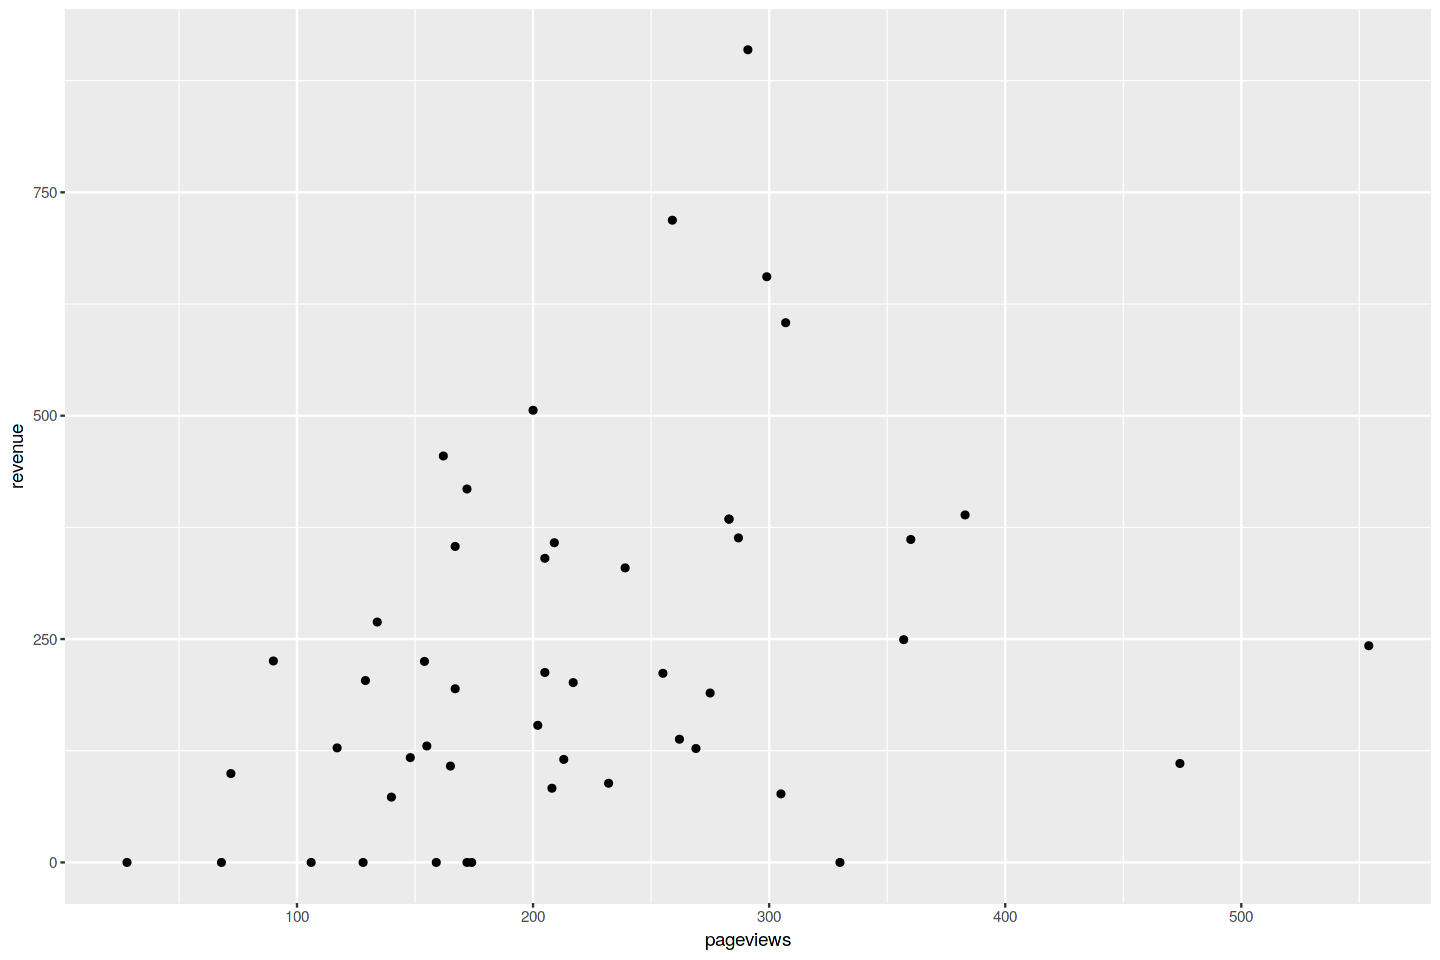

In [52]:
# Code 45: Scatter plot of daily pageviews and revenue
ec_ts %>%
    ggplot(aes(x=pageviews,y=revenue))+
    geom_point()

`geom_smooth()` using formula 'y ~ x'



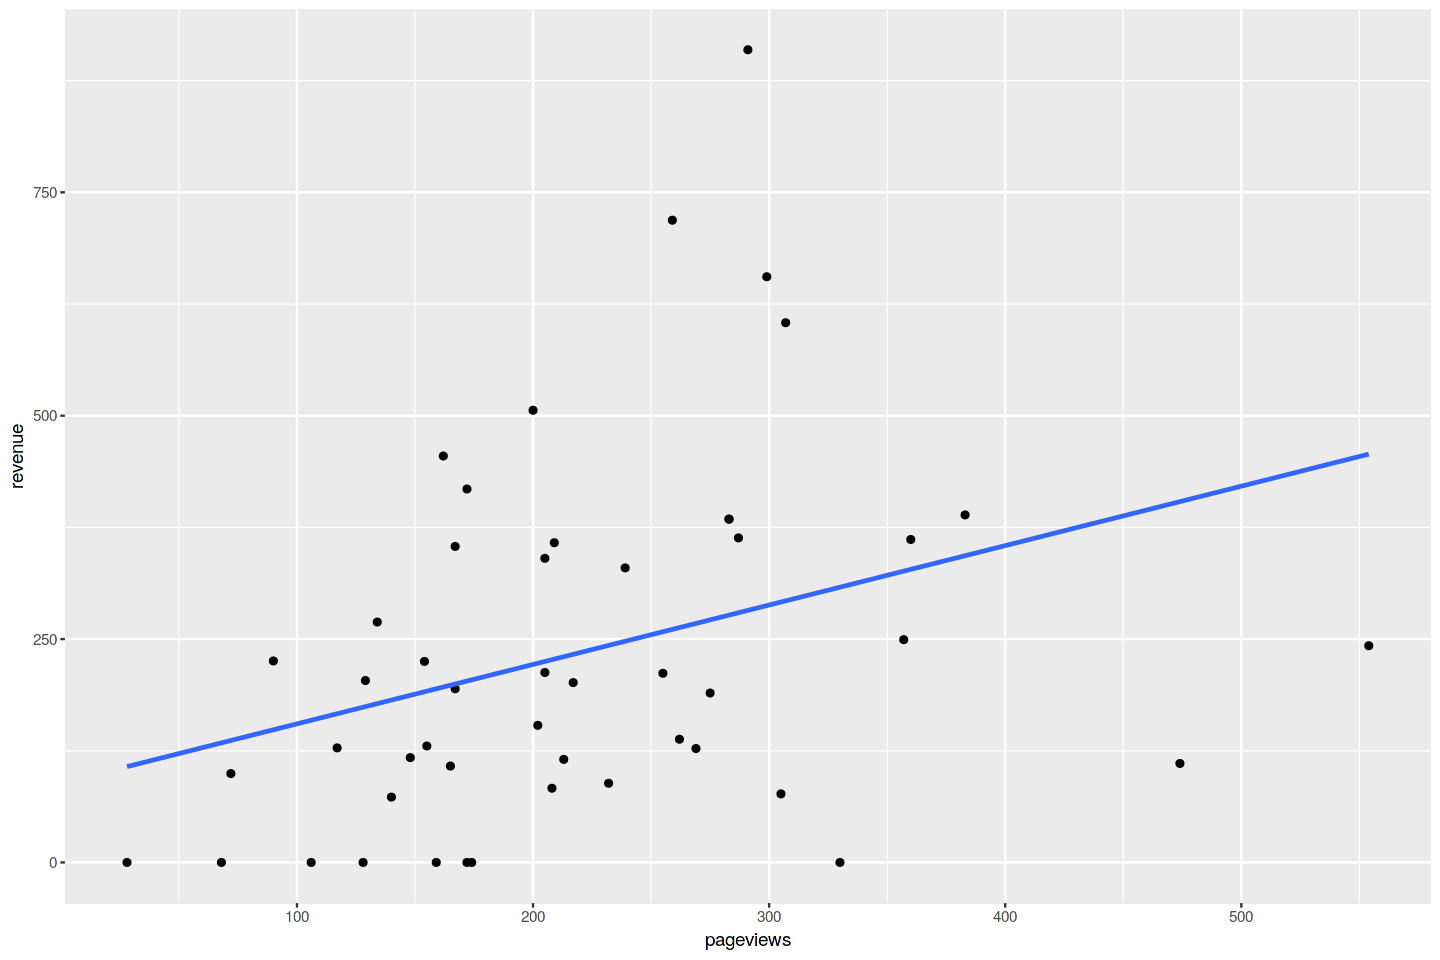

In [53]:
# Code 46: Add a regression line
ec_ts %>%
    ggplot(aes(x=pageviews,y=revenue))+
    geom_point()+
    geom_smooth(method="lm",se=F)

`geom_smooth()` using formula 'y ~ x'



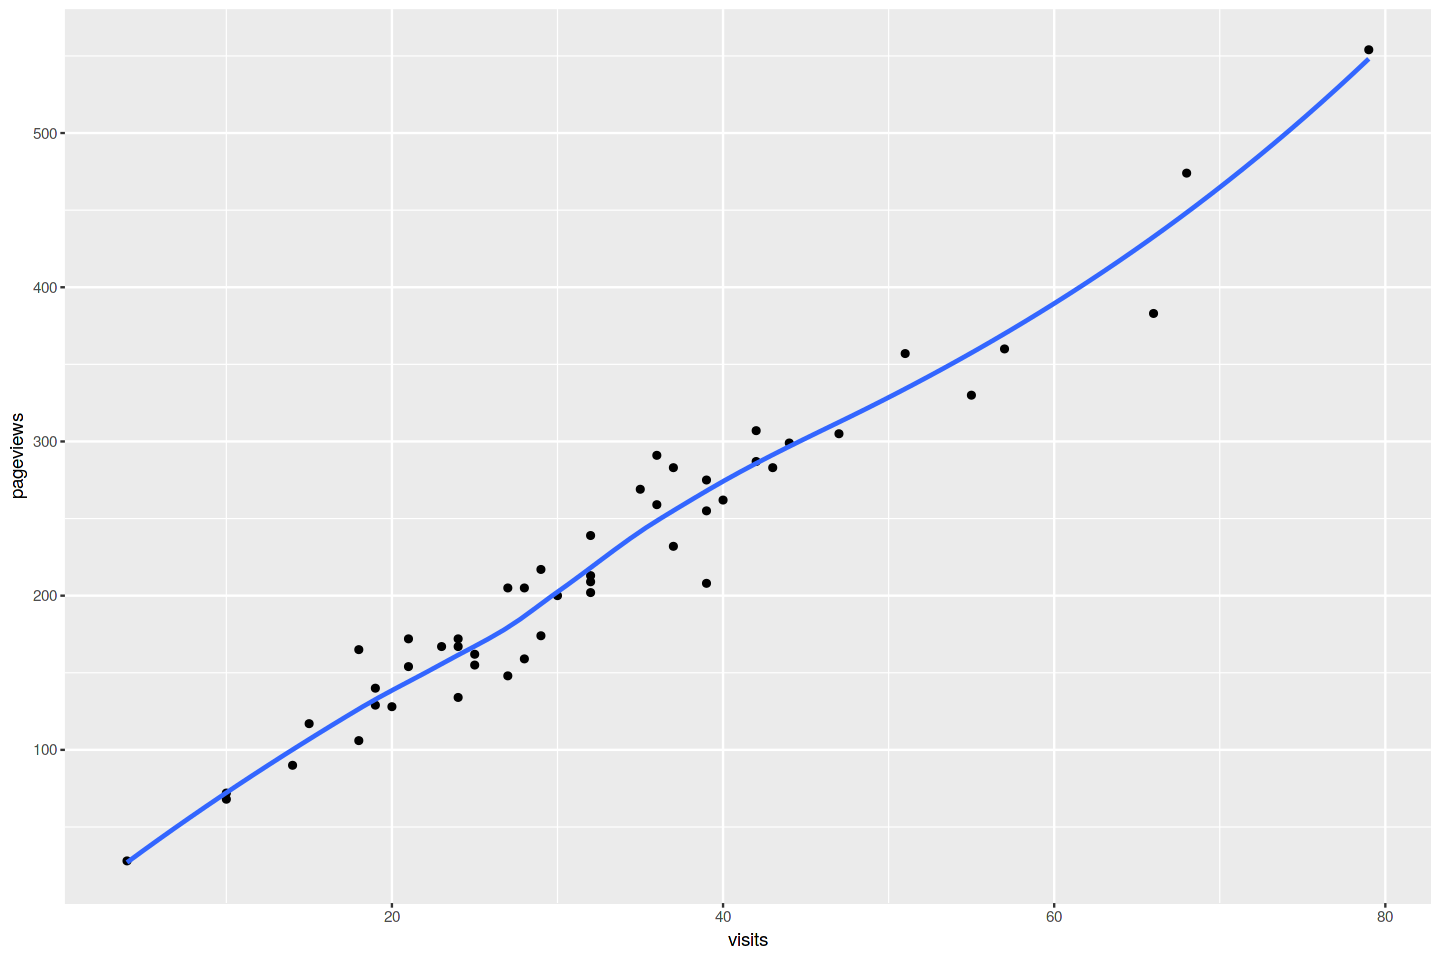

In [54]:
ec_ts %>%
    ggplot(aes(x=visits,y=pageviews))+
    geom_point()+
    geom_smooth(method="loess",se=F)

`geom_smooth()` using formula 'y ~ x'



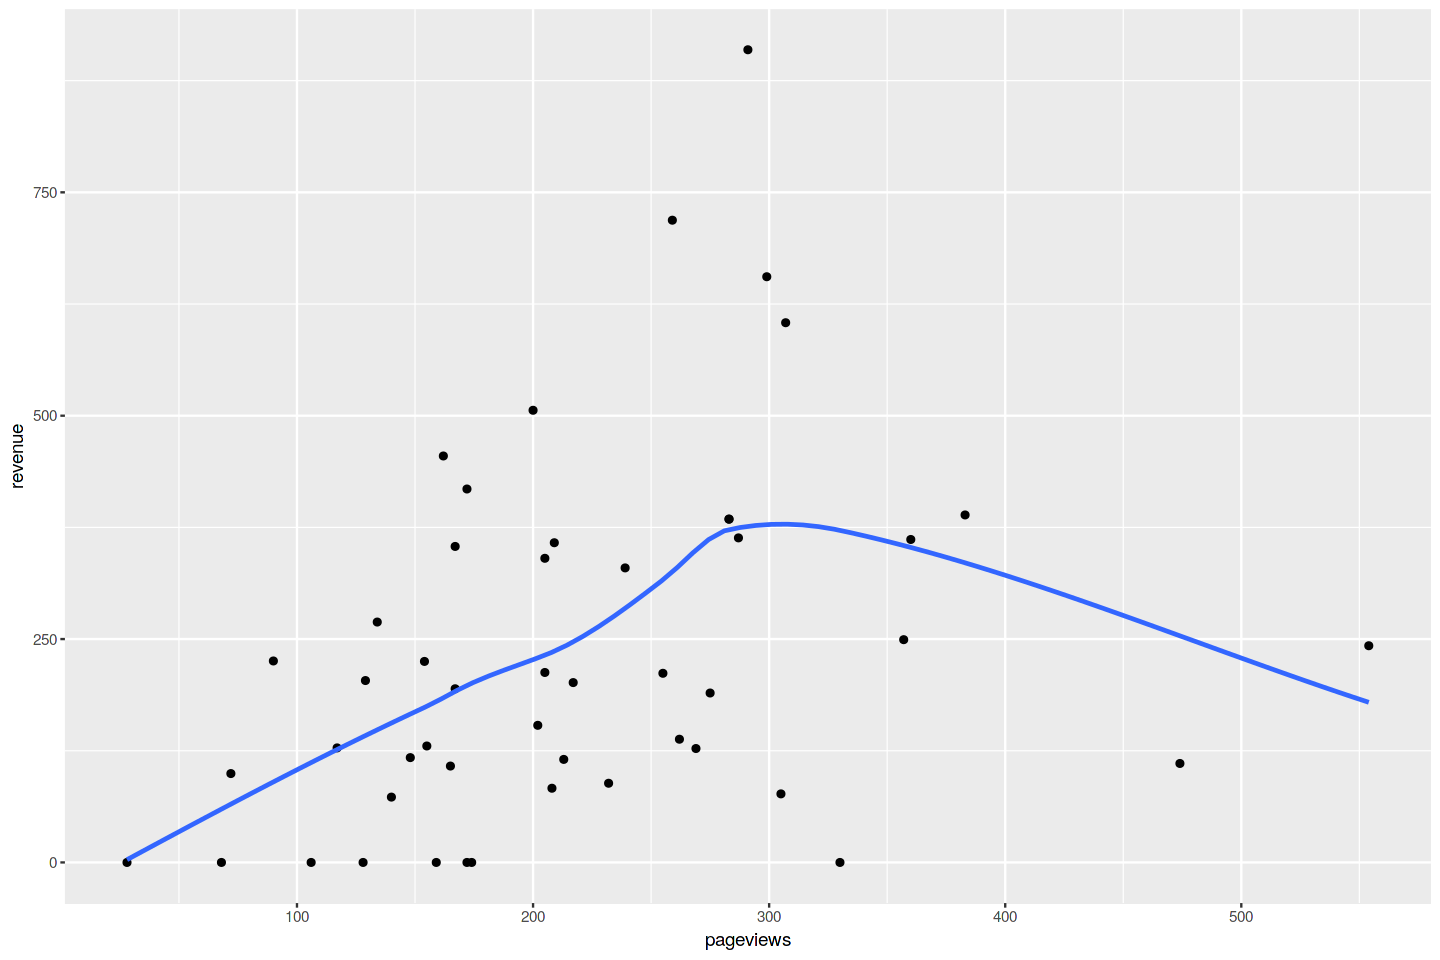

In [55]:
# Code 47: Add a 'loess' regression line
ec_ts %>%
    ggplot(aes(x=pageviews,y=revenue))+
    geom_point()+
    geom_smooth(method="loess",se=F)